In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import os

In [33]:
ls ../Results-Energy/ 

site1-energy.csv       site3-energy.csv       site5-energy.csv
site1-hist-energy.png  site3-hist-energy.png  site5-hist-energy.png
site2-energy.csv       site4-energy.csv       site6-energy.csv
site2-hist-energy.png  site4-hist-energy.png  site6-hist-energy.png


In [34]:
directory = "../Results-Energy/"
csv_files = []
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

# avg client power	avg server power	time	computer	energy	site
                
dataframes = []
for csv_file in csv_files:
    try:
        df = pd.read_csv(csv_file)
        dataframes.append(df)
    except Exception as e:
        print(f"Error importing {csv_file}: {e}")

df = pd.concat(dataframes, ignore_index=True)
display(df)

,avg client power,avg server power,time,computer,energy,site,theme,plugin
0,2.164591,2.207865,66.799,client energy,144.592497,4,2023,Smush
1,2.150000,2.128256,66.801,client energy,143.622150,4,2023,Smush
2,2.156364,2.178818,58.999,client energy,127.223298,4,2023,Smush
3,2.211215,2.162897,56.995,client energy,126.028196,4,2023,Smush
4,2.187624,2.190297,55.995,client energy,122.495993,4,2023,Smush
...,...,...,...,...,...,...,...,...
357,2.272115,2.264615,20.598,server energy,46.646548,2,Our,-
358,2.266346,2.212212,20.600,server energy,45.571558,2,Our,-
359,2.288426,2.262222,21.396,server energy,48.402507,2,Our,-
360,2.203125,2.258929,22.200,server energy,50.148214,2,Our,-


In [35]:
df['site'].unique()

array([4, 1, 6, 3, 5, 2])

In [54]:
df[df['computer']=='client energy'].head()

,avg client power,avg server power,time,computer,energy,site,theme,plugin
0,2.164591,2.207865,66.799,client energy,144.592497,4,2023,Smush
1,2.150000,2.128256,66.801,client energy,143.622150,4,2023,Smush
2,2.156364,2.178818,58.999,client energy,127.223298,4,2023,Smush
3,2.211215,2.162897,56.995,client energy,126.028196,4,2023,Smush
4,2.187624,2.190297,55.995,client energy,122.495993,4,2023,Smush


In [55]:
df[df['computer']=='server energy'].head()

,avg client power,avg server power,time,computer,energy,site,theme,plugin
30,2.164591,2.207865,66.799,server energy,147.483159,4,2023,Smush
31,2.150000,2.128256,66.801,server energy,142.169644,4,2023,Smush
32,2.156364,2.178818,58.999,server energy,128.548094,4,2023,Smush
33,2.211215,2.162897,56.995,server energy,123.274326,4,2023,Smush
34,2.187624,2.190297,55.995,server energy,122.645682,4,2023,Smush


In [37]:
df.columns

Index(['avg client power', 'avg server power', 'time', 'computer', 'energy',
       'site', 'theme', 'plugin'],
      dtype='object')

In [40]:
df.dtypes

avg client power    float64
avg server power    float64
time                float64
computer             object
energy              float64
site                  int64
theme                object
plugin               object
dtype: object

In [45]:
df.head()

,avg client power,avg server power,time,computer,energy,site,theme,plugin
0,2.164591,2.207865,66.799,client energy,144.592497,4,2023,Smush
1,2.150000,2.128256,66.801,client energy,143.622150,4,2023,Smush
2,2.156364,2.178818,58.999,client energy,127.223298,4,2023,Smush
3,2.211215,2.162897,56.995,client energy,126.028196,4,2023,Smush
4,2.187624,2.190297,55.995,client energy,122.495993,4,2023,Smush


<AxesSubplot:xlabel='energy', ylabel='Count'>

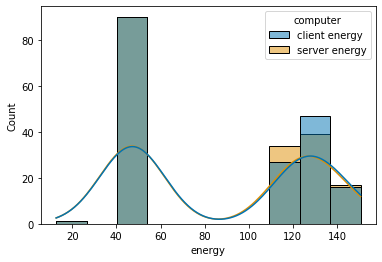

In [58]:
sns.histplot(data=df, x='energy',hue='computer', palette='colorblind',kde=True)

<AxesSubplot:xlabel='energy', ylabel='Density'>

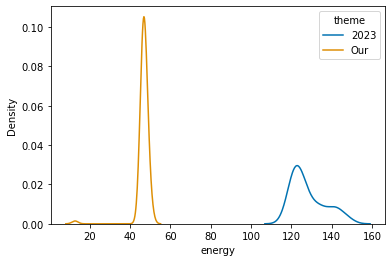

In [52]:
sns.kdeplot(data=df[df['computer']=='server energy'], x='energy',hue='theme', palette='colorblind')

<AxesSubplot:xlabel='energy', ylabel='plugin'>

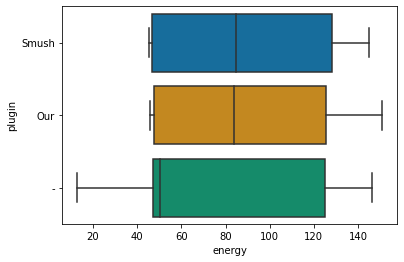

In [49]:
sns.boxplot(data=df[df['computer']=='client energy'], x='energy',y='plugin', palette='colorblind')

<AxesSubplot:xlabel='energy', ylabel='plugin'>

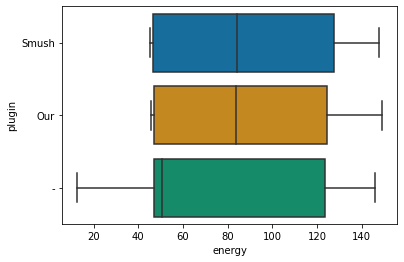

In [50]:
sns.boxplot(data=df[df['computer']=='server energy'], x='energy',y='plugin', palette='colorblind')

<AxesSubplot:xlabel='energy', ylabel='Density'>

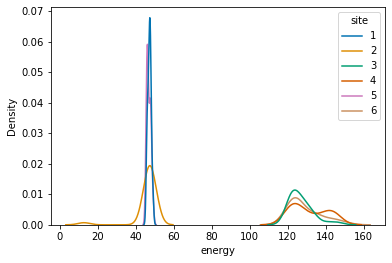

In [38]:
sns.kdeplot(data=df[df['computer']=='client energy'], x='energy',hue='site', palette='colorblind')

<AxesSubplot:xlabel='energy', ylabel='Density'>

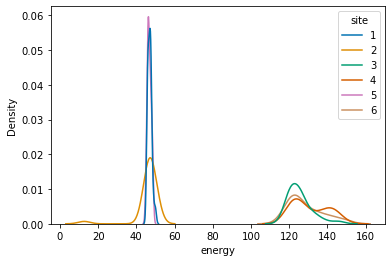

In [43]:
sns.kdeplot(data=df[df['computer']=='server energy'], x='energy',hue='site', palette='colorblind')

<AxesSubplot:xlabel='energy', ylabel='site'>

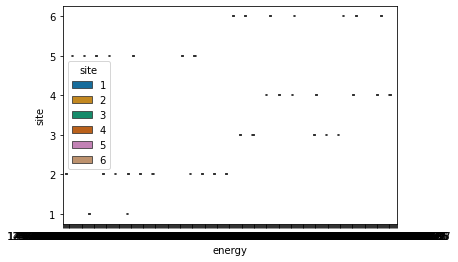

In [44]:
sns.boxplot(data=df, x='energy', hue='site',y='site', palette='colorblind')

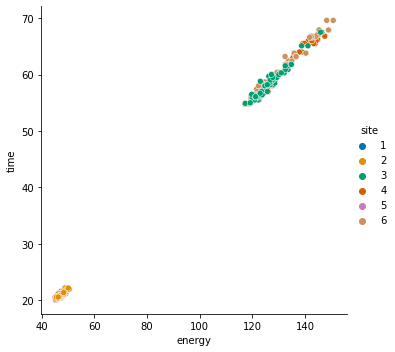

In [28]:
sns.relplot(data=df, x='energy', y='time', hue='site',  palette='colorblind')